<a href="https://colab.research.google.com/github/andersonmgomes/wgesad22_transformers/blob/main/GESAD2022_Transformers_Caderno02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

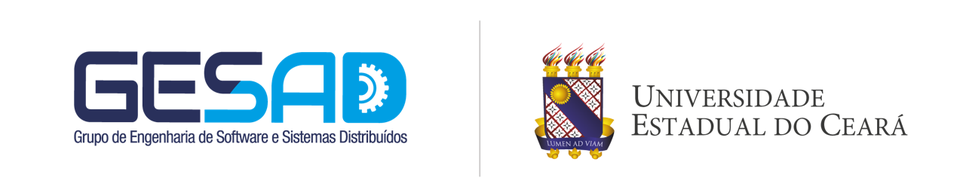

---
#<center><b>WGESAD22</b></center>
##<center><i>Workshop do Grupo de Engenharia de Software Adaptativo e Distribuído</i></center>
---

### <center>Prof.: [Paulo Henrique Maia](https://gesad.github.io/team/paulo-henrique/)</center>
### <center>Aluno: [Anderson Martins Gomes](https://www.linkedin.com/in/amartinsg/)</center>

---
##### <center>Fortaleza, agosto de 2022.</center>
---

# Notebook 2: "Behind The Pipeline"


---

## 2.1: Um Exemplo com Análise de Sentimentos

---


In [ ]:
#instalando a biblioteca transformers
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 5.3 MB/s 
     |████████████████████████████████| 69 kB 3.8 MB/s 
     |████████████████████████████████| 4.7 MB 29.2 MB/s 
     |████████████████████████████████| 212 kB 45.5 MB/s 
     |████████████████████████████████| 115 kB 21.7 MB/s 
     |████████████████████████████████| 101 kB 4.2 MB/s 
     |████████████████████████████████| 141 kB 7.5 MB/s 
     |████████████████████████████████| 596 kB 50.0 MB/s 
     |████████████████████████████████| 127 kB 51.8 MB/s 
     |████████████████████████████████| 6.6 MB 38.7 MB/s 
     |████████████████████████████████| 1.3 MB 48.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
   

In [ ]:
from transformers import pipeline #vide: https://huggingface.co/

#instanciando e usando um classificador (análise de sentimentos) com a função pipeline
classifier = pipeline("sentiment-analysis")
#lista de exemplos para test
SAMPLE_LIST = ["I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!"]
#chamando o classificador        
classifier(SAMPLE_LIST)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

### O mesmo exemplo sem utilizar a função "pipeline":

In [ ]:
from transformers import AutoTokenizer

In [ ]:
'''
Architecture: This is the skeleton of the model — the definition of each layer 
and each operation that happens within the model.
Checkpoints: These are the weights that will be loaded in a given architecture.
Model: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: 
it can mean both. This course will specify architecture or checkpoint when it matters 
to reduce ambiguity.
For example, BERT is an architecture while bert-base-cased, a set of weights trained 
by the Google team for the first release of BERT, is a checkpoint. 
However, one can say “the BERT model” and “the bert-base-cased model.”
'''
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english" #checkpoint ~ modelo
tokenizer = AutoTokenizer.from_pretrained(checkpoint) 
tokenizer #observe o conjunto de configurações (parâmetros) possíveis

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
#gerando os inputs para o modelo a partir do tokenizador
inputs = tokenizer(SAMPLE_LIST, padding=True, truncation=True, return_tensors="pt") #pt: PyTorch
inputs

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [ ]:
from transformers import AutoModelForSequenceClassification
# Vide: https://huggingface.co/course/chapter2/2?fw=pt#going-through-the-model
#carregando o modelo pré-treinado (transfer learning!!!)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)# transfer learning
model #observe a quantidade de parâmetros disponíveis

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [ ]:
outputs = model(**inputs)
outputs.logits

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)

In [ ]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

###Exercício para CASA: Implementar o NER(ou outra tarefa de NLP) sem utilizar a função pipeline